# Problem Statement
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

# Dataset:
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

# 1. Import Libraries and load dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
termDepositDataOrg = pd.read_csv("bank-full.csv")

# 2. Shape of the dataset, find missing values (D1)

In [3]:
termDepositDataOrg.shape

(45211, 17)

In [4]:
termDepositDataOrg.isnull().sum() # Check if there are any null values in data set

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [5]:
termDepositDataOrg.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


# 3. Univariate analysis (D1)

## 3.1 Column descriptions (D1)

In [6]:
# Bank client data:
# 1  - age (numeric)
# 2  - job : type of job (categorical)
# 3  - marital : marital status (categorical: 'divorced','married','single', note: 'divorced' means divorced or widowed)
# 4  - education (categorical: ‘primary’, ‘secondary’, ‘tertiary’, ‘unknown’)
# 5  - default: has credit in default? (categorical: 'no','yes','unknown')
# 6  - balance – average yearly balance in euros(numeric)
# 7  - housing: has housing loan? (categorical: 'no','yes’)
# 8  - loan: has personal loan? (categorical: 'no','yes')

# Related with the last contact of the current campaign:
# 9  - contact: contact communication type (categorical: 'cellular','telephone', ‘unknown’) 
# 10 - date: last contact date of the month (categorical: '1','2','3','4','5' and so on)
# 11 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
# 12 - duration: last contact duration, in seconds (numeric). 
#      Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no').
#      Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. 
#      Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# Other attributes:
# 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
# 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
# 15 - previous: number of contacts performed before this campaign and for this client (numeric)
# 16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'other', 'success', ‘unknown’)

# Output variable (desired target):
# 17 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## 3.2 Data types and description of the independent attributes (D1)

In [7]:
termDepositDataOrg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
termDepositDataOrg.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


* Categorical variables: job, marital, education, default, housing, loan, contact, month, poutcome, Target.
* Numeric variables: age, balance, day, duration, campaign, pdays, previous.

## 3.3 Convert the columns with an 'object' datatype into categorical variables (D2)

In [9]:
for feature in termDepositDataOrg.columns: # Loop through all columns in the dataframe
    if termDepositDataOrg[feature].dtype == 'object': # Only apply for columns with categorical strings
        termDepositDataOrg[feature] = pd.Categorical(termDepositDataOrg[feature])# Replace strings with an integer
termDepositDataOrg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [10]:
print(termDepositDataOrg.job.value_counts())
print("--------")
print(termDepositDataOrg.marital.value_counts())
print("--------")
print(termDepositDataOrg.education.value_counts())
print("--------")
print(termDepositDataOrg.default.value_counts())
print("--------")
print(termDepositDataOrg.housing.value_counts())
print("--------")
print(termDepositDataOrg.loan.value_counts())
print("--------")
print(termDepositDataOrg.contact.value_counts())
print("--------")
print(termDepositDataOrg.month.value_counts())
print("--------")
print(termDepositDataOrg.poutcome.value_counts())
print("--------")
print(termDepositDataOrg.Target.value_counts())
print("--------")

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
--------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
--------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
--------
no     44396
yes      815
Name: default, dtype: int64
--------
yes    25130
no     20081
Name: housing, dtype: int64
--------
no     37967
yes     7244
Name: loan, dtype: int64
--------
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
--------
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
--------
unknown    36959
failure  

In [11]:
replaceStruct = {
                "marital":     {"married": 1, "single": 2 ,"divorced": 3},
                "default":     {"no": 0, "yes": 1 },
                "housing":     {"no": 0, "yes": 1 },
                "loan":     {"no": 0, "yes": 1 },
                "month":     {"jan": 1, "feb":2 , "mar": 3, "apr": 4,"may": 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12},
                "poutcome":     {"other": 0, "unknown": 0, "failure": 1, "success": 2}, # Convert "other" and "unknown" to 0
                "Target":     {"no": 0, "yes": 1 }
}
oneHotCols = ["job","education","contact"]

In [12]:
termDepositData=termDepositDataOrg.copy()
termDepositData=termDepositData.replace(replaceStruct)
termDepositData=pd.get_dummies(termDepositData, columns=oneHotCols)

In [13]:
termDepositData.head(10)

,age,marital,default,balance,housing,loan,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,1,0,2143,1,0,5,5,261,1,...,0,0,0,0,0,1,0,0,0,1
1,44,2,0,29,1,0,5,5,151,1,...,1,0,0,0,1,0,0,0,0,1
2,33,1,0,2,1,1,5,5,76,1,...,0,0,0,0,1,0,0,0,0,1
3,47,1,0,1506,1,0,5,5,92,1,...,0,0,0,0,0,0,1,0,0,1
4,33,2,0,1,0,0,5,5,198,1,...,0,0,1,0,0,0,1,0,0,1
5,35,1,0,231,1,0,5,5,139,1,...,0,0,0,0,0,1,0,0,0,1
6,28,2,0,447,1,1,5,5,217,1,...,0,0,0,0,0,1,0,0,0,1
7,42,3,1,2,1,0,5,5,380,1,...,0,0,0,0,0,1,0,0,0,1
8,58,1,0,121,1,0,5,5,50,1,...,0,0,0,1,0,0,0,0,0,1
9,43,2,0,593,1,0,5,5,55,1,...,1,0,0,0,1,0,0,0,0,1


In [14]:
termDepositData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 33 columns):
age                    45211 non-null int64
marital                45211 non-null int64
default                45211 non-null int64
balance                45211 non-null int64
housing                45211 non-null int64
loan                   45211 non-null int64
day                    45211 non-null int64
month                  45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
poutcome               45211 non-null int64
Target                 45211 non-null int64
job_admin.             45211 non-null uint8
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-em

# 4. Multivariate analysis (D1)

## 4.1 Analyze all bi-variate relationships (D1)

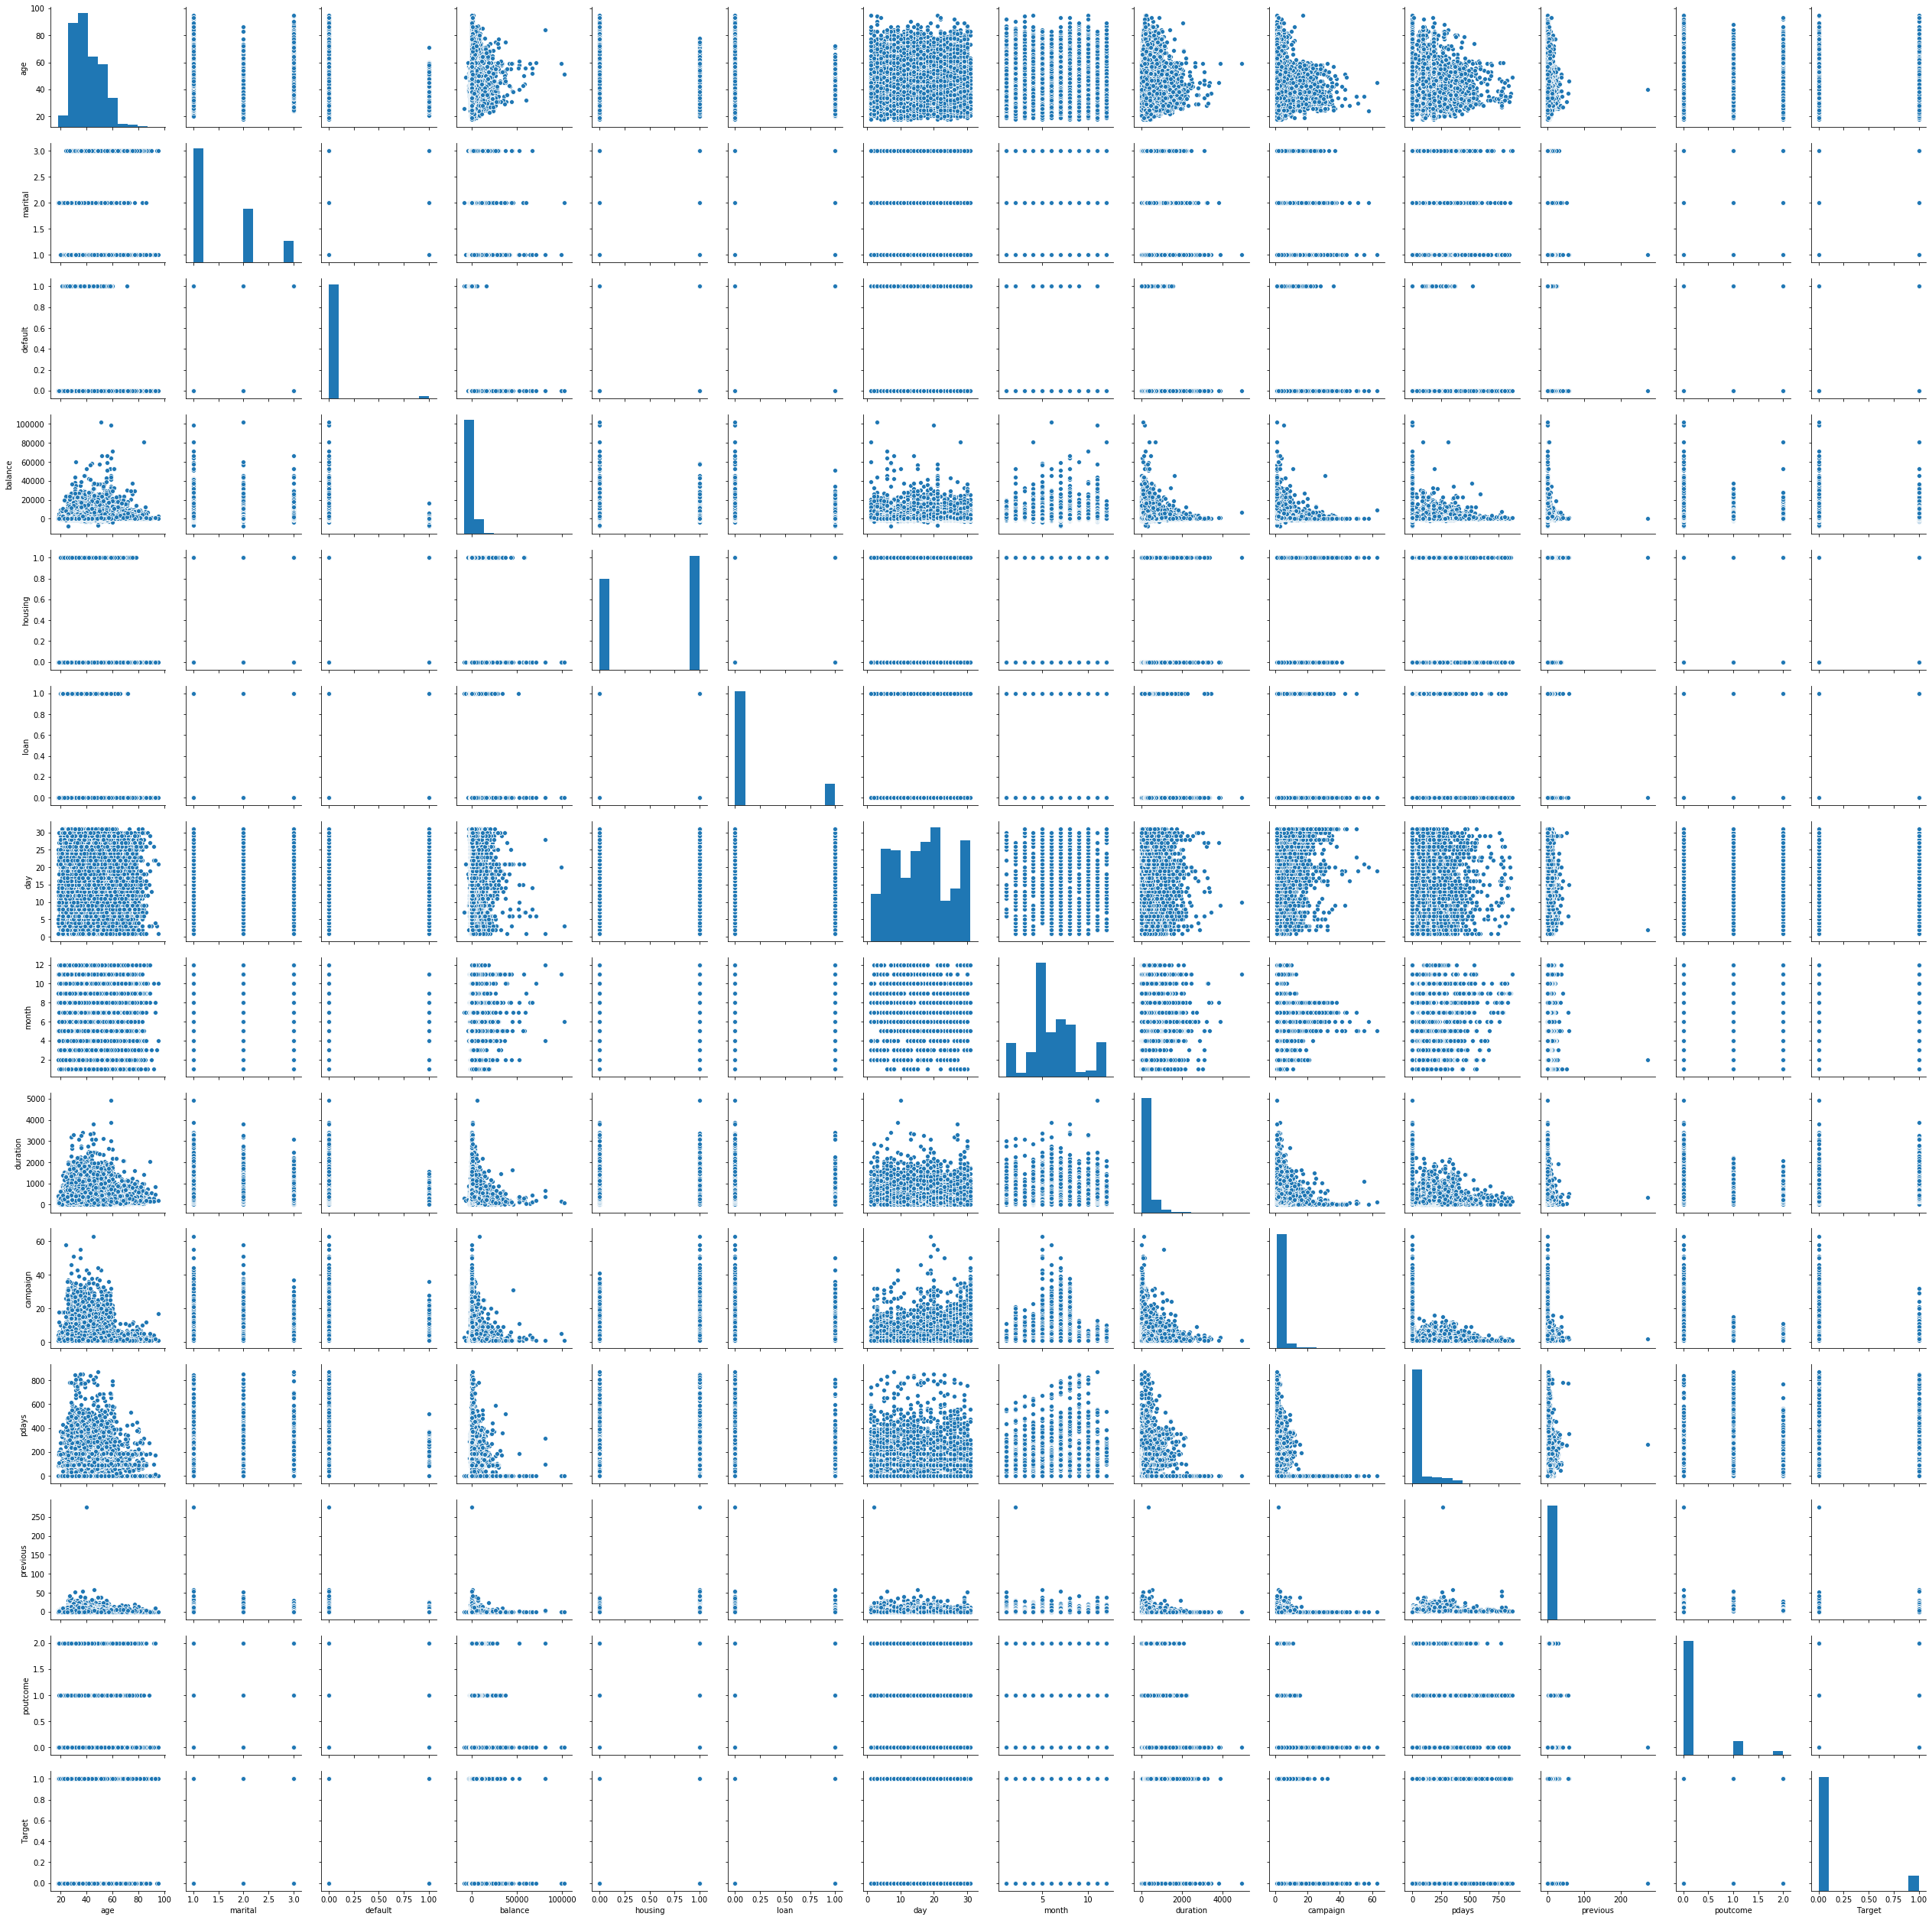

In [15]:
df_attr = termDepositData.loc[:,['age', 'marital', 'default', 'balance', 
                                 'housing', 'loan', 'day', 'month', 'duration', 
                                 'campaign', 'pdays', 'previous', 'poutcome', 'Target']] #compare all attributes visually to check for relationships that can be exploited

sns.pairplot(df_attr)

In [16]:
df_attr.corr()

,age,marital,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Target
age,1.000000,-0.126351,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,0.092903,-0.004648,0.004760,-0.023758,0.001288,0.024445,0.025155
marital,-0.126351,1.000000,0.018404,-0.028172,-0.011671,-0.018526,-0.005217,-0.044321,0.018834,-0.029294,0.020832,0.006876,0.008721,0.043846
default,-0.017879,0.018404,1.000000,-0.066745,-0.006025,0.077234,0.009424,0.014989,-0.010021,0.016822,-0.029979,-0.018329,-0.036096,-0.022419
balance,0.097783,-0.028172,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.094605,0.021560,-0.014578,0.003435,0.016674,0.035571,0.052838
housing,-0.185513,-0.011671,-0.006025,-0.068768,1.000000,0.041323,-0.027982,-0.173887,0.005075,-0.023599,0.124178,0.037076,0.000784,-0.139173
loan,-0.015655,-0.018526,0.077234,-0.084350,0.041323,1.000000,0.011370,0.021638,-0.012412,0.009980,-0.022754,-0.011043,-0.043474,-0.068185
day,-0.009120,-0.005217,0.009424,0.004503,-0.027982,0.011370,1.000000,0.101989,-0.030206,0.162490,-0.093044,-0.051710,-0.070162,-0.028348
month,0.092903,-0.044321,0.014989,0.094605,-0.173887,0.021638,0.101989,1.000000,-0.011866,0.054868,-0.108940,-0.035600,-0.011490,0.018717
duration,-0.004648,0.018834,-0.010021,0.021560,0.005075,-0.012412,-0.030206,-0.011866,1.000000,-0.084570,-0.001565,0.001203,0.020345,0.394521
campaign,0.004760,-0.029294,0.016822,-0.014578,-0.023599,0.009980,0.162490,0.054868,-0.084570,1.000000,-0.088628,-0.032855,-0.104541,-0.073172


In [17]:
df_attr.corr().mask(abs(df_attr.corr()) <= 0.65, np.nan)

,age,marital,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Target
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
campaign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


* Most variables have weak bi-variate relationship.
* There is high correlation between "**poutcome**" and "**pdays**" variables.

## 4.2 Analyze relationship between "poutcome" and "pdays" (D1)

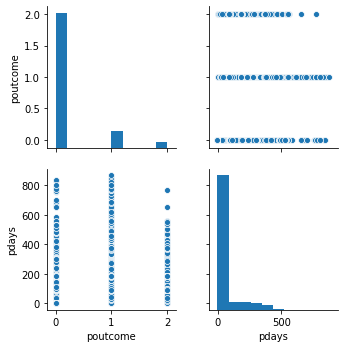

In [18]:
sns.pairplot(termDepositData.loc[:,["poutcome", "pdays"]])

* If "**pdays**" = -1, then most likely "**poutcome**" = 0.
* If clients were not contacted before, outcome of the previous marketing campaign would be either "**other**" or "**unknown**".

## 4.3 Analyze relationships between all columns and "Target" column (D1)

In [19]:
termDepositData.corr()["Target"].abs().sort_values(ascending = False)

Target                 1.000000
duration               0.394521
poutcome               0.246551
contact_unknown        0.150935
housing                0.139173
contact_cellular       0.135873
pdays                  0.103621
previous               0.093236
job_retired            0.079245
job_student            0.076897
campaign               0.073172
job_blue-collar        0.072083
loan                   0.068185
education_tertiary     0.066448
balance                0.052838
marital                0.043846
education_primary      0.040393
education_secondary    0.036388
job_management         0.032919
day                    0.028348
job_services           0.027864
age                    0.025155
default                0.022419
job_unemployed         0.020390
job_entrepreneur       0.019662
month                  0.018717
job_housemaid          0.015195
contact_telephone      0.014042
education_unknown      0.012053
job_technician         0.008970
job_admin.             0.005637
job_self

* "**duration**" and "**poutcome**" columns have a notable correlation with "**Target**" column.

## 4.4 Analyze relationship between "poutcome" and "Target" column (D1)

In [20]:
termDepositData[(termDepositData["poutcome"] == 0) & (termDepositData["Target"] == 0)].count()["Target"]

35106

* If outcomes of the previous marketing campaign are either "**other**" or "**unknown**", it's likely that those clients haven't subscribed to term deposit before.

# 5. Drop "duration" column (D2)

In [21]:
termDepositData.drop(["duration"], axis=1, inplace=True)

# 6. Create the training set and test set in ratio of 70:30 (D2)

In [22]:
X = termDepositData.drop(["Target"], axis=1)
y = termDepositData.pop("Target")

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# 7. Preprocess columns (D2)

In [24]:
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

# 8. Create Logistic Regression model and print the accuracy (D3)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model_liblinear = LogisticRegression(random_state=1, solver="liblinear", max_iter=1000, class_weight={0:0.5,1:2})
model_liblinear.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 0.5, 1: 2}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_predict_liblinear = model_liblinear.predict(X_test)
print("X_train liblinear acc:" + str(model_liblinear.score(X_train, y_train)))
print("X_train liblinear acc:" + str(model_liblinear.score(X_test, y_test)))

X_train liblinear acc:0.8464941384649414
X_train liblinear acc:0.8485697434385137


In [28]:
metrics.confusion_matrix(y_test, y_predict_liblinear,labels=[0, 1])

array([[10919,  1094],
       [  960,   591]], dtype=int64)

In [29]:
print(metrics.classification_report(y_test, y_predict_liblinear))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     12013
           1       0.35      0.38      0.37      1551

    accuracy                           0.85     13564
   macro avg       0.63      0.64      0.64     13564
weighted avg       0.85      0.85      0.85     13564



In [30]:
model_liblinear.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight={0: 0.5, 1: 2}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_predict_libnear = model_liblinear.predict(X_test_scaled)
print("X_train_scaled liblinear acc:" + str(model_liblinear.score(X_train_scaled, y_train)))
print("X_test_scaled liblinear acc:" + str(model_liblinear.score(X_test_scaled, y_test)))

X_train_scaled liblinear acc:0.8462413498909849
X_test_scaled liblinear acc:0.8471689767030375


In [32]:
metrics.confusion_matrix(y_test, y_predict_libnear,labels=[0, 1])

array([[10895,  1118],
       [  955,   596]], dtype=int64)

In [33]:
print(metrics.classification_report(y_test, y_predict_libnear))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     12013
           1       0.35      0.38      0.37      1551

    accuracy                           0.85     13564
   macro avg       0.63      0.65      0.64     13564
weighted avg       0.85      0.85      0.85     13564



In [34]:
model_liblinear.fit(X_train, y_train)
acc_liblinear = model_liblinear.score(X_test, y_test)
y_predict_libnear = model_liblinear.predict(X_test)
f1_score_target_1 = metrics.f1_score(y_test, y_predict_libnear, labels=[1])
model_liblinear.fit(X_train_scaled, y_train)
acc_liblinear_scaled = model_liblinear.score(X_test_scaled, y_test)
y_predict_libnear_scaled = model_liblinear.predict(X_test_scaled)
f1_score_target_1_scaled = metrics.f1_score(y_test, y_predict_libnear_scaled, labels=[1])
resultsDf = pd.DataFrame({'Method':['Logistic Regression', 'Logistic Regression scaled'], 
                          'accuracy': [acc_liblinear, acc_liblinear_scaled],
                          'f1-score for Target 1': [f1_score_target_1, f1_score_target_1_scaled]})
resultsDf

,Method,accuracy,f1-score for Target 1
0,Logistic Regression,0.848570,0.365266
1,Logistic Regression scaled,0.847169,0.365084


# 9. Create Decision Tree model and print the accuracy (D3)

In [35]:
model_dTree = DecisionTreeClassifier(random_state=1, criterion='entropy', max_depth=15, max_leaf_nodes=20, class_weight={0:1,1:3})
model_dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 3}, criterion='entropy',
                       max_depth=15, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [36]:
print("X_train dTree acc:" + str(model_dTree.score(X_train, y_train)))
print("X_test dTree acc:" + str(model_dTree.score(X_test, y_test)))

X_train dTree acc:0.8685183429708977
X_test dTree acc:0.8676644057800059


In [37]:
y_predict_dTree = model_dTree.predict(X_test)
metrics.confusion_matrix(y_test, y_predict_dTree,labels=[0, 1])

array([[10981,  1032],
       [  763,   788]], dtype=int64)

In [38]:
print(metrics.classification_report(y_test, y_predict_dTree))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92     12013
           1       0.43      0.51      0.47      1551

    accuracy                           0.87     13564
   macro avg       0.68      0.71      0.70     13564
weighted avg       0.88      0.87      0.87     13564



In [39]:
model_dTree.fit(X_train, y_train)
acc_dTree = model_dTree.score(X_test, y_test)
y_predict_dTree = model_dTree.predict(X_test)
f1_score_target_1 = metrics.f1_score(y_test, y_predict_dTree, labels=[1])
resultsDf = pd.concat([resultsDf, pd.DataFrame({'Method':['Decision Tree'], 
                          'accuracy': [acc_dTree],
                          'f1-score for Target 1': [f1_score_target_1]})])
resultsDf

,Method,accuracy,f1-score for Target 1
0,Logistic Regression,0.848570,0.365266
1,Logistic Regression scaled,0.847169,0.365084
0,Decision Tree,0.867664,0.467517


# 10. Calculating feature importance from Decision Tree

In [40]:
feat_importances = model_dTree.tree_.compute_feature_importances(normalize=True)
feat_cols = X_train.columns

feat_imp_dict = dict(zip(feat_cols, feat_importances))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
poutcome,0.389665
month,0.197841
contact_unknown,0.155433
day,0.090811
housing,0.069052
pdays,0.050997
age,0.026943
balance,0.010609
marital,0.008650
loan,0.000000


* From this, we can infer that "**poutcome**", "**month**" are the variables that impact term deposit decision.

# 11. Create Random Forest model and print the accuracy (D3)

In [41]:
from sklearn.ensemble import RandomForestClassifier
model_rfcl = RandomForestClassifier(random_state=1, n_estimators=50, max_features=25, class_weight={0:1,1:4}, max_depth=15, min_samples_leaf=14)
model_rfcl.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 4},
                       criterion='gini', max_depth=15, max_features=25,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=14,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)

In [42]:
print("X_train rfcl acc:" + str(model_rfcl.score(X_train, y_train)))
print("X_test rfcl acc:" + str(model_rfcl.score(X_test, y_test)))

X_train rfcl acc:0.8909533289095333
X_test rfcl acc:0.8753317605426127


In [43]:
y_predict_rfcl = model_rfcl.predict(X_test)
metrics.confusion_matrix(y_test, y_predict_rfcl,labels=[0, 1])

array([[11100,   913],
       [  778,   773]], dtype=int64)

In [44]:
print(metrics.classification_report(y_test, y_predict_rfcl))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     12013
           1       0.46      0.50      0.48      1551

    accuracy                           0.88     13564
   macro avg       0.70      0.71      0.70     13564
weighted avg       0.88      0.88      0.88     13564



In [45]:
model_rfcl.fit(X_train, y_train)
acc_rfcl = model_rfcl.score(X_test, y_test)
y_predict_rfcl = model_rfcl.predict(X_test)
f1_score_target_1 = metrics.f1_score(y_test, y_predict_rfcl, labels=[1])
resultsDf = pd.concat([resultsDf, pd.DataFrame({'Method':['Random Forest'], 
                          'accuracy': [acc_rfcl],
                          'f1-score for Target 1': [f1_score_target_1]})])
resultsDf

,Method,accuracy,f1-score for Target 1
0,Logistic Regression,0.848570,0.365266
1,Logistic Regression scaled,0.847169,0.365084
0,Decision Tree,0.867664,0.467517
0,Random Forest,0.875332,0.477603


# 12. Apply Adaboost Ensemble Algorithm and print the accuracy (D3)

In [46]:
from sklearn.ensemble import AdaBoostClassifier
model_abcl = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1, criterion='entropy', max_depth=2, class_weight={0:1,1:4}),
    n_estimators=50, random_state=1)
model_abcl.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight={0: 1,
                                                                       1: 4},
                                                         criterion='entropy',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                       

In [47]:
y_predict_ab = model_abcl.predict(X_test)
print("X_train abcl acc:" + str(model_abcl.score(X_train, y_train)))
print("X_test abcl acc:" + str(model_abcl.score(X_test, y_test)))

X_train abcl acc:0.8715518058583752
X_test abcl acc:0.8675906812149808


In [48]:
metrics.confusion_matrix(y_test, y_predict_ab,labels=[0, 1])

array([[10992,  1021],
       [  775,   776]], dtype=int64)

In [49]:
print(metrics.classification_report(y_test, y_predict_ab))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     12013
           1       0.43      0.50      0.46      1551

    accuracy                           0.87     13564
   macro avg       0.68      0.71      0.69     13564
weighted avg       0.88      0.87      0.87     13564



In [50]:
model_rfcl.fit(X_train, y_train)
acc_abcl = model_abcl.score(X_test, y_test)
y_predict_abcl = model_abcl.predict(X_test)
f1_score_target_1 = metrics.f1_score(y_test, y_predict_abcl, labels=[1])
resultsDf = pd.concat([resultsDf, pd.DataFrame({'Method':['AdaBoost'], 
                          'accuracy': [acc_abcl],
                          'f1-score for Target 1': [f1_score_target_1]})])
resultsDf

,Method,accuracy,f1-score for Target 1
0,Logistic Regression,0.848570,0.365266
1,Logistic Regression scaled,0.847169,0.365084
0,Decision Tree,0.867664,0.467517
0,Random Forest,0.875332,0.477603
0,AdaBoost,0.867591,0.463560


# 13. Apply GradientBoost Ensemble Algorithm and print the accuracy (D3)

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbcl = GradientBoostingClassifier(n_estimators=50, learning_rate=1, random_state=1)
model_gbcl.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None, learning_rate=1,
                           loss='deviance', max_depth=3, max_features=None,
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=50, n_iter_no_change=None,
                           presort='auto', random_state=1, subsample=1.0,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [52]:
y_predict_gb = model_gbcl.predict(X_test)
print("X_train gbcl acc:" + str(model_gbcl.score(X_train, y_train)))
print("X_test gbcl acc:" + str(model_gbcl.score(X_test, y_test)))

X_train gbcl acc:0.9037191518943344
X_test gbcl acc:0.8919935122382778


In [53]:
metrics.confusion_matrix(y_test, y_predict_gb,labels=[0, 1])

array([[11722,   291],
       [ 1174,   377]], dtype=int64)

In [54]:
print(metrics.classification_report(y_test, y_predict_gb))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.56      0.24      0.34      1551

    accuracy                           0.89     13564
   macro avg       0.74      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564



In [55]:
model_gbcl.fit(X_train, y_train)
acc_gbcl = model_gbcl.score(X_test, y_test)
y_predict_gbcl = model_gbcl.predict(X_test)
f1_score_target_1 = metrics.f1_score(y_test, y_predict_gbcl, labels=[1])
model_gbcl.fit(X_train_scaled, y_train)
acc_gbcl_scaled = model_gbcl.score(X_test_scaled, y_test)
y_predict_gbcl_scaled = model_gbcl.predict(X_test_scaled)
f1_score_target_1_scaled = metrics.f1_score(y_test, y_predict_gbcl_scaled, labels=[1])
resultsDf = pd.concat([resultsDf, pd.DataFrame({'Method':['GradientBoost', 'GradientBoost scaled'], 
                          'accuracy': [acc_gbcl, acc_gbcl_scaled],
                          'f1-score for Target 1': [f1_score_target_1, f1_score_target_1_scaled]})])
resultsDf

,Method,accuracy,f1-score for Target 1
0,Logistic Regression,0.848570,0.365266
1,Logistic Regression scaled,0.847169,0.365084
0,Decision Tree,0.867664,0.467517
0,Random Forest,0.875332,0.477603
0,AdaBoost,0.867591,0.463560
0,GradientBoost,0.891994,0.339793
1,GradientBoost scaled,0.891330,0.337826


# 14. Apply Bagging Ensemble Algorithm and print the accuracy (D3)

In [56]:
from sklearn.ensemble import BaggingClassifier

model_bgcl = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, criterion='entropy', max_depth=9, class_weight={0:1,1:4}),
                         n_estimators=50, max_samples=.5, random_state=1)
model_bgcl.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 1,
                                                                      1: 4},
                                                        criterion='entropy',
                                                        max_depth=9,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=1,
   

In [57]:
y_predict_bg = model_bgcl.predict(X_test)
print("X_train bgcl acc:" + str(model_bgcl.score(X_train, y_train)))
print("X_test bgcl acc:" + str(model_bgcl.score(X_test, y_test)))

X_train bgcl acc:0.8867823174392517
X_test bgcl acc:0.876658802713064


In [58]:
metrics.confusion_matrix(y_test, y_predict_bg,labels=[0, 1])

array([[11161,   852],
       [  821,   730]], dtype=int64)

In [59]:
print(metrics.classification_report(y_test, y_predict_bg))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     12013
           1       0.46      0.47      0.47      1551

    accuracy                           0.88     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.88      0.88      0.88     13564



In [60]:
model_bgcl.fit(X_train, y_train)
acc_bgcl = model_bgcl.score(X_test, y_test)
y_predict_bgcl = model_bgcl.predict(X_test)
f1_score_target_1 = metrics.f1_score(y_test, y_predict_bgcl, labels=[1])
resultsDf = pd.concat([resultsDf, pd.DataFrame({'Method':['Bagging'], 
                          'accuracy': [acc_bgcl],
                          'f1-score for Target 1': [f1_score_target_1]})])
resultsDf

,Method,accuracy,f1-score for Target 1
0,Logistic Regression,0.848570,0.365266
1,Logistic Regression scaled,0.847169,0.365084
0,Decision Tree,0.867664,0.467517
0,Random Forest,0.875332,0.477603
0,AdaBoost,0.867591,0.463560
0,GradientBoost,0.891994,0.339793
1,GradientBoost scaled,0.891330,0.337826
0,Bagging,0.876659,0.466007


# 15. Compare results (D3)

* Based on problem statement, the best model should help the marketing team identify potential customers, thus should have both high "**accuracy**" and "**f1-score**" for Target = "**1**".
* With these criteria, **Random Forest**, **Bagging** and **Decision Tree** models have the best test predictions.

# 16. Tuning the models (D4)

* For **Logistic Regression** model:
    * **class_weight={0:0.5,1:2}**: Set to fix highly skewed Target column, with the ratio of 0:1 is 7.55:1.
    * **max_iter=1000**: Maximum number of iterations taken for the solvers to converge = 1000.
    * Scaling parameters doesn't improve the prediction.
* For **Decision Tree** model:
    * **class_weight={0:1,1:3}**: Set to fix the skewed Target column.
    * **max_depth=15**: Maximum depth of the tree = 15.
    * **max_leaf_nodes=20**: Maximum of leaf nodes = 20.
* For **Random Forest** model:
    * **class_weight={0:1,1:4}**: Set to fix the skewed Target column.
    * **n_estimators=50**: Number of trees in the forest = 50.
    * **max_features=25**: Number of features to consider when looking for the best split = 25.
    * **max_depth=15**: Maximum depth of the tree = 15.
    * **min_samples_leaf=14**: Minimum number of samples required to be at a leaf node = 14.
* For **AdaBoost** model:
    * **class_weight={0:1,1:4}**: Set to fix the skewed Target column.
    * **n_estimators=50**: Number of trees in the forest = 50.
    * **max_depth=2**: Maximum depth of the tree = 2.
* For **GradientBoost** model:
    * **n_estimators=50**: Number of boosting stages to perform = 50.
    * **learning_rate=1**: Learning rate shrinks the contribution of each tree.
    * Scaling parameters doesn't improve the prediction.
* For **Bagging** model:
    * **base_estimator=DecisionTreeClassifier(random_state=1, criterion='entropy', max_depth=9, class_weight={0:1,1:4})**: Base estimator to fit on random subsets of the dataset.
    * **n_estimators=50**: Number of base estimators = 50.
    * **max_samples=.5**: Number of samples to draw from X to train each base estimator = 50% sample.